In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import holidays
from sklearn.metrics import mean_squared_error

In [49]:
data = pd.read_excel(r"C:\Users\kriti\kriti python\Hourly Patient Data.xlsx")


In [50]:
data['Time'] = pd.to_datetime(data['Time'])

In [51]:
data.set_index('Time', inplace=True)

In [52]:
data.drop(columns=['ESI 1', 'ESI 2', 'ESI 3', 'ESI 4'], inplace=True)

In [53]:
esi1_daily = data['ESI 5'].resample('D').sum()

In [54]:
esi1_daily_df = esi1_daily.reset_index()

In [55]:
esi1_daily_df.columns = ['Date', 'ESI 5']

In [56]:
print(esi1_daily_df)

           Date  ESI 5
0    2017-01-01      2
1    2017-01-02      2
2    2017-01-03      4
3    2017-01-04      3
4    2017-01-05      1
...         ...    ...
1456 2020-12-27      5
1457 2020-12-28      8
1458 2020-12-29      9
1459 2020-12-30      8
1460 2020-12-31      3

[1461 rows x 2 columns]


In [57]:
train = esi1_daily_df.iloc[:int(len(esi1_daily_df)*0.9)]
test = esi1_daily_df.iloc[int(len(esi1_daily_df)*0.9):]

In [58]:
us_holidays = holidays.US(years=range(2017, 2021))

In [59]:
train['Date'] = pd.to_datetime(train['Date'])
train['Holiday'] = train['Date'].apply(lambda x: int(x in us_holidays))
train['Day_of_Week'] = train['Date'].dt.day_name()
train['Month'] = train['Date'].dt.month
train['Trend'] = range(1, len(train) + 1)

C:\Users\kriti\AppData\Local\Temp\ipykernel_17280\2476409844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Date'] = pd.to_datetime(train['Date'])
C:\Users\kriti\AppData\Local\Temp\ipykernel_17280\2476409844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Holiday'] = train['Date'].apply(lambda x: int(x in us_holidays))
C:\Users\kriti\AppData\Local\Temp\ipykernel_17280\2476409844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [60]:

train.rename(columns={'ESI 5': 'ESI_5'}, inplace=True)

res = smf.ols(formula='ESI_5 ~ C(Holiday) + C(Day_of_Week) + C(Month) + Trend + I(Trend**2) + I(Trend**3)', data=train).fit()


C:\Users\kriti\AppData\Local\Temp\ipykernel_17280\1824889290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.rename(columns={'ESI 5': 'ESI_5'}, inplace=True)


In [61]:
test['Date'] = pd.to_datetime(test['Date'])
test['Holiday'] = test['Date'].apply(lambda x: int(x in us_holidays))
test['Day_of_Week'] = test['Date'].dt.day_name()
test['Month'] = test['Date'].dt.month
test['Trend'] = range(len(train) + 1, len(train) + len(test) + 1)

C:\Users\kriti\AppData\Local\Temp\ipykernel_17280\2015112868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Date'] = pd.to_datetime(test['Date'])
C:\Users\kriti\AppData\Local\Temp\ipykernel_17280\2015112868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Holiday'] = test['Date'].apply(lambda x: int(x in us_holidays))
C:\Users\kriti\AppData\Local\Temp\ipykernel_17280\2015112868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [62]:
ypred = res.predict(test)

In [63]:
# Check the column names in train and test data
print(train.columns)



Index(['Date', 'ESI_5', 'Holiday', 'Day_of_Week', 'Month', 'Trend'], dtype='object')


In [64]:
# Check the column names in train and test data

print(test.columns)


Index(['Date', 'ESI 5', 'Holiday', 'Day_of_Week', 'Month', 'Trend'], dtype='object')


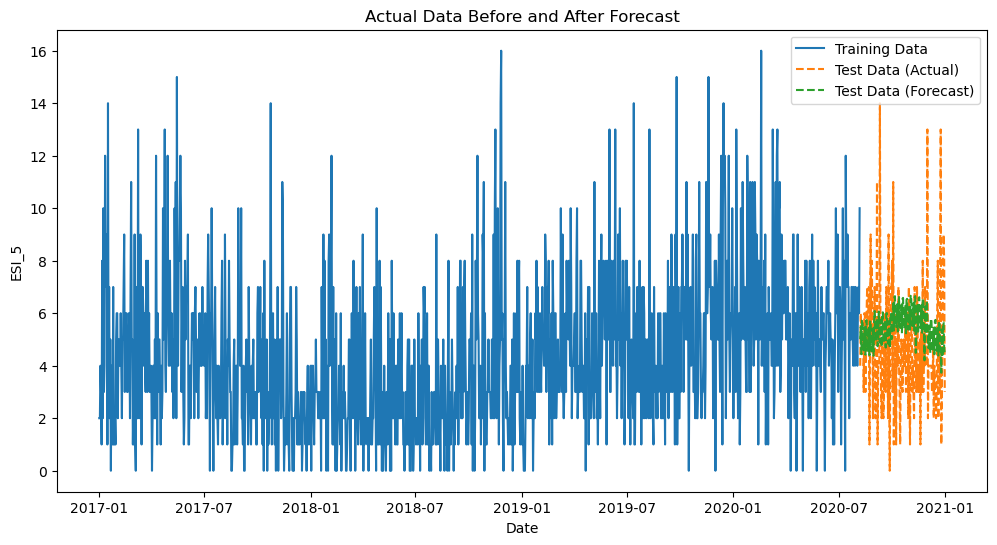

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(train['Date'], train['ESI_5'], label='Training Data')
plt.plot(test['Date'], test['ESI 5'], label='Test Data (Actual)', linestyle='--')
plt.plot(test['Date'], ypred, label='Test Data (Forecast)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('ESI_5')
plt.title('Actual Data Before and After Forecast')
plt.legend()
plt.show()


In [66]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [67]:
mape = mean_absolute_percentage_error(test['ESI 5'], ypred)
print("MAPE:", mape)

MAPE: inf


In [68]:
rmse = np.sqrt(mean_squared_error(test['ESI 5'], ypred))
print("RMSE:", rmse)

RMSE: 2.5200841048004707


In [69]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    # Find indices of zero values in y_true
    zero_indices = np.where(y_true == 0)[0]
    
    # Create a boolean mask to filter zero values
    mask = np.ones(len(y_true), dtype=bool)
    mask[zero_indices] = False
    
    # Filter y_true and y_pred using the mask
    y_true_filtered = y_true[mask]
    y_pred_filtered = y_pred[mask]
    
    # Calculate absolute percentage error
    absolute_errors = np.abs(y_true_filtered - y_pred_filtered)
    
    # Calculate percentage errors
    percentage_errors = absolute_errors / y_true_filtered
    
    # Calculate mean absolute percentage error
    mape = np.mean(percentage_errors) * 100
    return mape


mape = mean_absolute_percentage_error(test['ESI 5'], ypred)
print("MAPE:", mape)


MAPE: 68.07611699002247


In [72]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))



mae = mean_absolute_error(test['ESI 5'], ypred)
print("MAE:", mae)

MAE: 2.0107645271814447
